In [93]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.support.wait import WebDriverWait
from datetime import datetime
import time
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [14]:
# get browser, maximise window, open web page
browser= webdriver.Edge(service=Service(EdgeChromiumDriverManager().install()))
browser.maximize_window()

browser.get('https://www.tripadvisor.com/Hotel_Review-g187849-d2340336-Reviews-Armani_Hotel-Milan_Lombardy.html')

In [15]:
#wait for cookies, click accept
cookies_wait = WebDriverWait(browser, timeout=3)
#browser.find_element()
cookies_accept = cookies_wait.until(lambda b:b.find_element('xpath','//*[@id="onetrust-accept-btn-handler"]'))
cookies_accept.click()

In [16]:

expand = browser.find_element('xpath',"//div[contains(@data-test-target,'expand-review')]")
if expand:
    expand.click()

In [17]:
reviews = browser.find_elements('xpath',".//div[@data-reviewid]")
reviews

[<selenium.webdriver.remote.webelement.WebElement (session="962ede613d1440516d7d8d5d72bfad91", element="2F7E0960EE102D46BFF7F32CEB38EBBD_element_60")>,
 <selenium.webdriver.remote.webelement.WebElement (session="962ede613d1440516d7d8d5d72bfad91", element="2F7E0960EE102D46BFF7F32CEB38EBBD_element_61")>,
 <selenium.webdriver.remote.webelement.WebElement (session="962ede613d1440516d7d8d5d72bfad91", element="2F7E0960EE102D46BFF7F32CEB38EBBD_element_62")>,
 <selenium.webdriver.remote.webelement.WebElement (session="962ede613d1440516d7d8d5d72bfad91", element="2F7E0960EE102D46BFF7F32CEB38EBBD_element_63")>,
 <selenium.webdriver.remote.webelement.WebElement (session="962ede613d1440516d7d8d5d72bfad91", element="2F7E0960EE102D46BFF7F32CEB38EBBD_element_64")>,
 <selenium.webdriver.remote.webelement.WebElement (session="962ede613d1440516d7d8d5d72bfad91", element="2F7E0960EE102D46BFF7F32CEB38EBBD_element_65")>,
 <selenium.webdriver.remote.webelement.WebElement (session="962ede613d1440516d7d8d5d72bf

In [18]:
try:
    with open ('ArmaniHotelReviews.csv', 'w', encoding="utf-8") as csvFile:
        csvWriter=csv.writer(csvFile)
        
        for i in range(10): #loop 10 pagine

            time.sleep(3)

            reviews =browser.find_elements('xpath', ".//div[@data-reviewid]")

            for review in reviews:

                rating_bubble = review.find_element('xpath',".//span[contains(@class,'ui_bubble_rating bubble_')]")
                score = rating_bubble.get_attribute("class").split("_")[3]

                date_obj = review.find_element('xpath',".//span[@class='teHYY _R Me S4 H3']")
                date_rec = date_obj.text.replace("Date of stay: ",'')
                date = datetime.strptime(date_rec, '%B %Y')

                title = review.find_element('xpath',".//div[contains(@data-test-target, 'review-title')]").text

                comment = review.find_element('xpath',".//span[@class='QewHA H4 _a']").text.replace("\n"," ")

                csvWriter.writerow([score, date.year, date.month, title, comment])

            browser.find_element('xpath', './/a[@class="ui_button nav next primary "]').click()
finally:
    browser.quit()

In [56]:
df=pd.read_csv("ArmaniHotelReviews.csv", names=["score", "year", "month", "title", "comment"])

In [57]:
df.head()

,score,year,month,title,comment
0,50,2023,8,EB,"Everything is fine, except for the cold feel o..."
1,30,2023,7,First class team,The team at the Armani were amongst the best I...
2,50,2023,7,Modernist Milano,The Armani is a strikingly modern hotel in the...
3,50,2023,6,Modern luxurious stay with very friendly staff,We stayed in this hotel for 5 nights to explor...
4,50,2023,5,Better than heaven a true testament of Armani ...,No question this is the only place to stay in ...


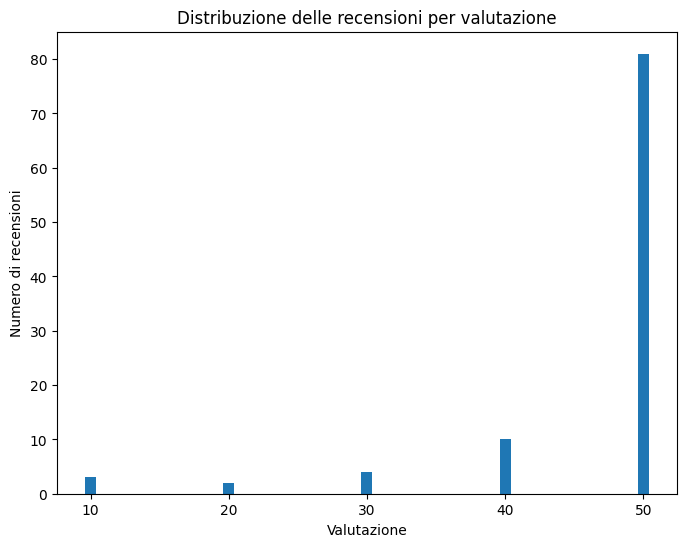

In [58]:
# Seleziona la colonna in posizione 0 (la prima colonna) e conta il numero di recensioni per ciascun valore
colonna_0_counts = df.iloc[:, 0].value_counts().sort_index()

# Crea un grafico a barre
plt.figure(figsize=(8, 6))
plt.bar(colonna_0_counts.index, colonna_0_counts.values)
plt.xlabel('Valutazione')
plt.ylabel('Numero di recensioni')
plt.title('Distribuzione delle recensioni per valutazione')
plt.xticks(colonna_0_counts.index)
plt.show()


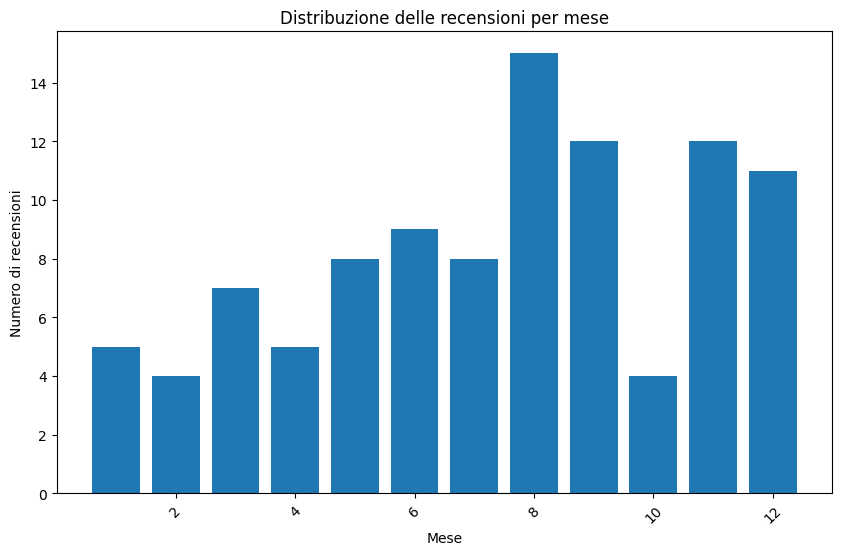

In [59]:

# Estrai i mesi dalla colonna in posizione 2
mesi = df.iloc[:, 2]

# Conta il numero di recensioni per ciascun mese
mesi_counts = mesi.value_counts().sort_index()

# Crea un grafico a barre
plt.figure(figsize=(10, 6))
plt.bar(mesi_counts.index, mesi_counts.values)
plt.xlabel('Mese')
plt.ylabel('Numero di recensioni')
plt.title('Distribuzione delle recensioni per mese')
plt.xticks(rotation=45)
plt.show()


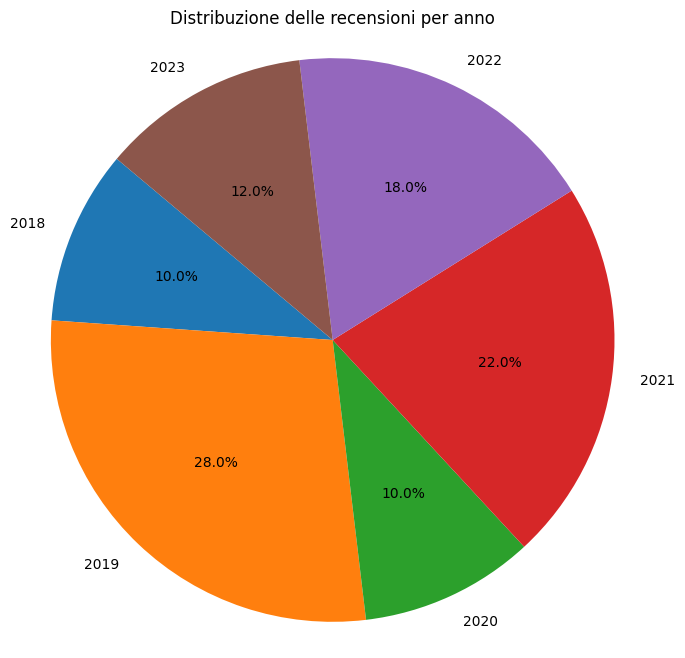

In [60]:

# Estrai gli anni dalla colonna in posizione 1
anni = df.iloc[:, 1]

# Conta il numero di recensioni per ciascun anno
anni_counts = anni.value_counts().sort_index()

# Crea un grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(anni_counts.values, labels=anni_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Per mantenere il grafico a forma di cerchio
plt.title('Distribuzione delle recensioni per anno')
plt.show()


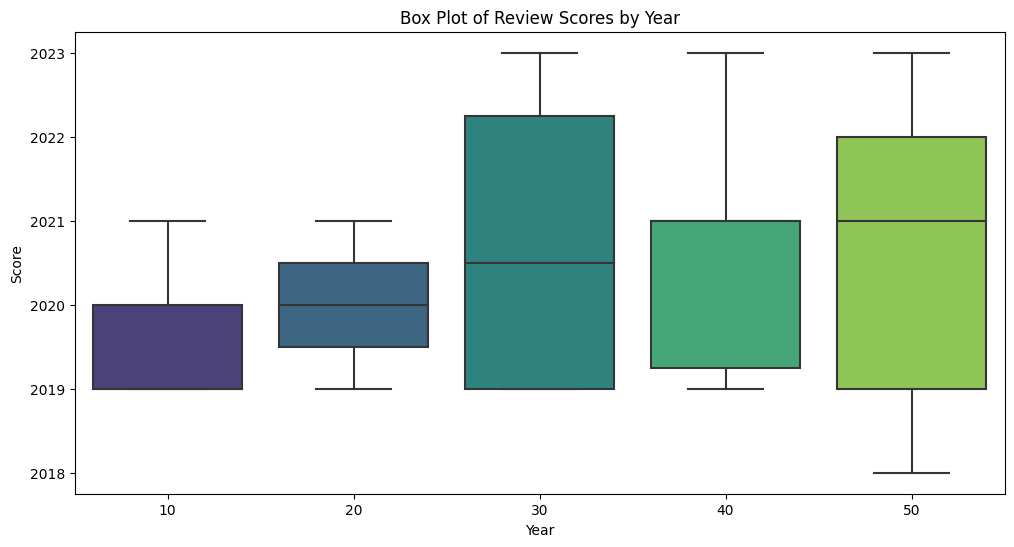

In [65]:
# Create a box plot for scores by year

plt.figure(figsize=(12, 6))

sns.boxplot(data=df, x='score', y='year', palette='viridis')

plt.xlabel('Year')

plt.ylabel('Score')

plt.title('Box Plot of Review Scores by Year')

plt.show()

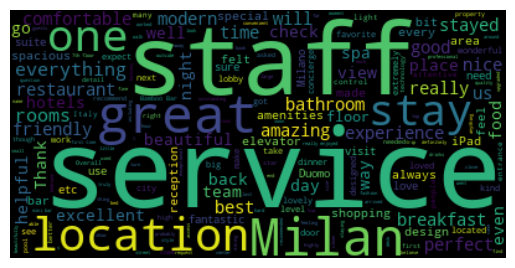

In [87]:
stopwords = set(STOPWORDS)
stopwords.update(["armani","hotel",'room'])
reviews = " ".join(reviews for reviews in df.comment)
WordCloud = WordCloud(stopwords=stopwords).generate(reviews)
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

C:\Users\MarcoBirigozzi\AppData\Local\Temp\ipykernel_21928\3363793521.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


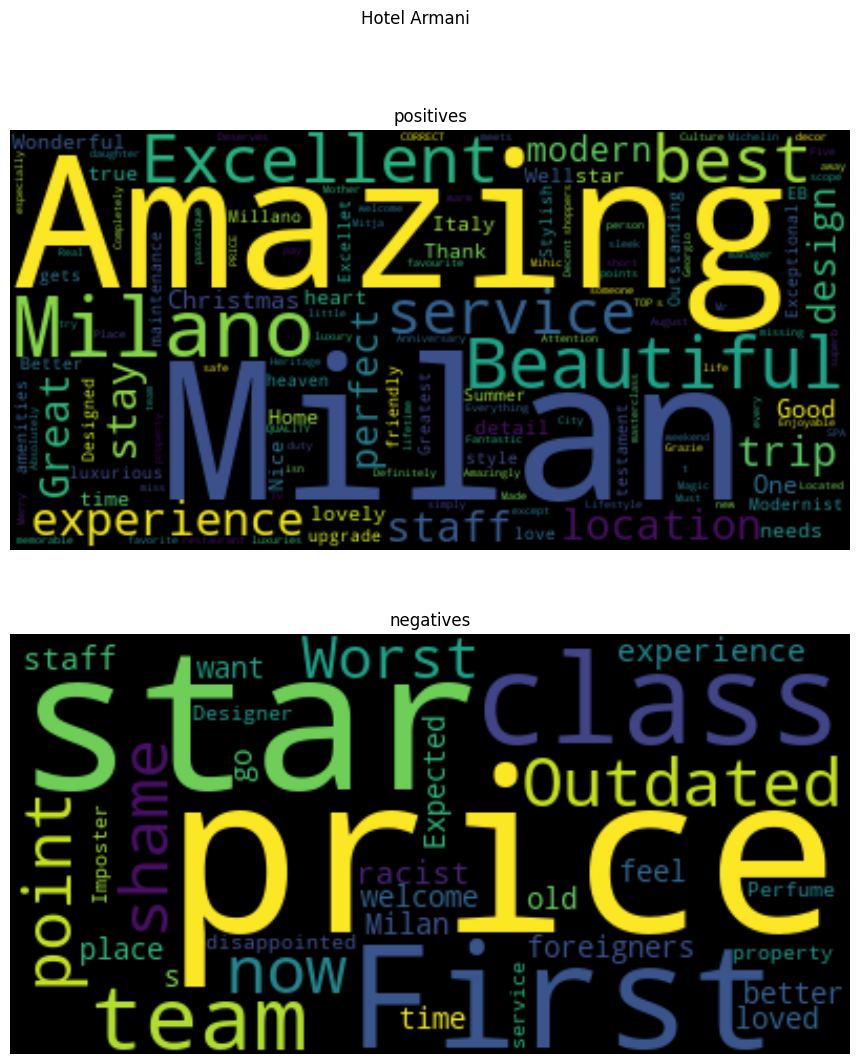

In [95]:
df['sentiment'] = df['score'].apply(lambda score : +1 if score > 30 else -1)

positive =df[df['sentiment'] == 1]
negative =df[df['sentiment'] == -1]

pos = " ".join(review for review in positive.title)
wordcloud_pos=WordCloud(stopwords=stopwords).generate(pos)
neg = " ".join(review for review in negative.title)
wordcloud_neg=WordCloud(stopwords=stopwords).generate(neg)

fig, axes =plt.subplots(2,1, figsize=(12,12))
axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].axis("off")
axes[0].set_title('positives')
axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].axis("off")
axes[1].set_title('negatives')
fig.suptitle("Hotel Armani")
fig.show()